### Loading required liabraries

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels
import seaborn as sns
import sklearn
from sklearn import *
from sklearn.utils import shuffle
import statsmodels.formula.api as smf
import statsmodels.api as sm
#from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
#import random
#import statsmodels.api as sm

/home/joyous/anacondas3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Loading and creating our Data Frame

In [3]:
df = pd.read_csv("salary.csv")
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


### examining the data frame

In [4]:
df.shape

(514, 11)

The shape of our Data Frame tells us that we have 514 rows and 11 colums


In [5]:
print('Number of employee in the Data Frame is : ',len(df))

Number of employee in the Data Frame is :  514


In [6]:
null_values= df.isnull().sum().sum()
print('Number of missing values is: ',null_values)
null = df[df.salary.isnull()]
null

Number of missing values is:  1


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


We have 1 missing value in our salary colunm at index 208

In [7]:
df = df.dropna()
df.isnull().sum().sum()


0

We decided to drop our missing value as it is just one value.

In [8]:
df =df.rename(columns ={'male':'gender'})
df.gender = ['male' if i == 1
                  else
                  'female' for i in df.gender]


We decided to rename our male column to gender 

In [9]:
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,male,3,0
1,58000.0,1,0,0,1.24,1,0,1,male,2,0
2,45500.0,0,0,0,1.21,1,0,1,male,3,2
3,35782.0,0,2,1,0.99,1,0,1,male,4,1
4,34731.0,0,2,2,0.91,1,0,1,male,4,1


## QUESTION 1

###  Splitting the data set to Training and Testing 

In [10]:
df_shuffle = shuffle(df)

df_shuffle.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
277,52580.0,2,22,9,0.78,1,0,3,male,4,0
444,37359.0,6,3,3,0.85,1,0,1,female,2,2
70,39986.0,1,4,4,1.17,1,0,1,male,4,0
206,71543.0,13,7,7,1.33,1,1,3,male,2,3
149,43188.0,1,13,1,0.85,1,0,3,male,3,0


In [11]:
df_shuffle.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
277,52580.0,2,22,9,0.78,1,0,3,male,4,0
444,37359.0,6,3,3,0.85,1,0,1,female,2,2
70,39986.0,1,4,4,1.17,1,0,1,male,4,0
206,71543.0,13,7,7,1.33,1,1,3,male,2,3
149,43188.0,1,13,1,0.85,1,0,3,male,3,0


In [12]:
train, test = train_test_split(df_shuffle, test_size=0.2)
train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs
6,61008.0,0,2,2,1.33,1,0,1,male,2,0
409,31000.0,0,0,0,0.95,1,0,1,female,3,1
36,48000.0,3,0,0,1.14,1,0,1,male,1,0
269,55411.0,0,22,8,0.91,1,0,3,male,1,0
121,48078.0,0,11,5,1.04,1,0,2,male,3,0


We randomly split our data into training and testing set. Our training  is 80 %  and our test set is 20 % of the original data.

### Examining the data set

In [13]:
train.shape

(410, 11)

Our training set has 410 rows and 11 columns

In [14]:
test.shape

(103, 11)

Our test set has 103 rows and 11 columns

In [15]:
print('Our minimum salary is :',train.salary.min())

Our minimum salary is : 29000.0


In [16]:
print('Our maximum salary is :',train.salary.max())

Our maximum salary is : 96156.0


### Checking for extreme values

In [17]:
q75, q25 = np.percentile(train['salary'], [75 ,25])
iqr = q75 - q25
print('Our interquatile range is :',iqr)

Our interquatile range is : 20671.765625


In [18]:
cut_off = iqr * 1.5
cut_off_lower = q25 - cut_off
cut_off_upper = q75 + cut_off

In [19]:
cut_off_upper


91679.4140625

This is our upper limit for our salary range and any value greater than this will be classified as an outlier

In [20]:
cut_off_lower

8992.3515625

This is our lower limit for our salary range and any value less than this will be classified as an outlier

In [21]:
train['outlier_or_not'] = ['lower' if i < cut_off_lower else 'upper' if i > cut_off_upper else 'nothing' for i in train.salary]

/home/joyous/anacondas3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
train.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs,outlier_or_not
6,61008.0,0,2,2,1.33,1,0,1,male,2,0,nothing
409,31000.0,0,0,0,0.95,1,0,1,female,3,1,nothing
36,48000.0,3,0,0,1.14,1,0,1,male,1,0,nothing
269,55411.0,0,22,8,0.91,1,0,3,male,1,0,nothing
121,48078.0,0,11,5,1.04,1,0,2,male,3,0,nothing


In [23]:
x = train.outlier_or_not[train.outlier_or_not == 'upper']
x

377    upper
Name: outlier_or_not, dtype: object

From these result we can say we have  outliers   which are greater than the upper limit of the salary range

In [24]:
x = train.outlier_or_not[train.outlier_or_not == 'lower']
x

Series([], Name: outlier_or_not, dtype: object)

### Creating a histograms to show the distribution of the variables

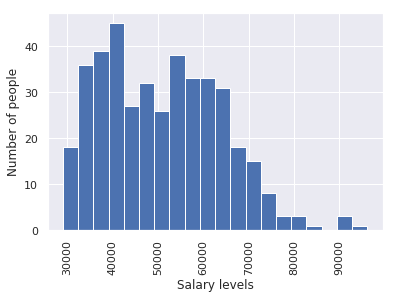

In [25]:
sns.set()
plt.hist(x= train.salary, bins=20)
plt.xlabel('Salary levels')
plt.xticks(rotation= 90, horizontalalignment='center')
plt.ylabel('Number of people')
plt.show()

In [52]:
# normal_train = np.array(train)
# normalized_train = preprocessing.normalize(train)




In [75]:
#normalized_train=(train['salary']-train[['salary']].mean())/train['salary'].std()

#normalized_train

In [74]:
train['salary'] = train['salary']/train['salary'].max()
train.head()

/home/joyous/anacondas3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,gender,Field,yearsabs,outlier_or_not
6,0.634469,0,2,2,1.33,1,0,1,male,2,0,nothing
409,0.322393,0,0,0,0.95,1,0,1,female,3,1,nothing
36,0.499189,3,0,0,1.14,1,0,1,male,1,0,nothing
269,0.576261,0,22,8,0.91,1,0,3,male,1,0,nothing
121,0.500000,0,11,5,1.04,1,0,2,male,3,0,nothing


In [76]:
#train.head()

In [77]:
#normalized_train

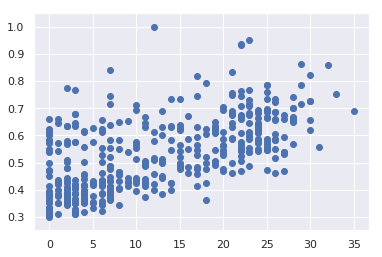

In [79]:
sns.set()
plt.scatter(y = train['salary'], x = train['yearsworked'])
plt.show()

### Scatterplot showing the relationship between Years Worked and Salary

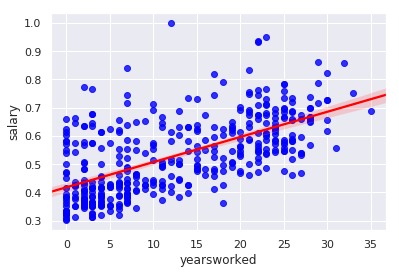

In [82]:
sns.set()
sns.regplot(x='yearsworked', y='salary', data=train, scatter_kws={"color": "blue"}, line_kws={"color": "Red"})
plt.show()

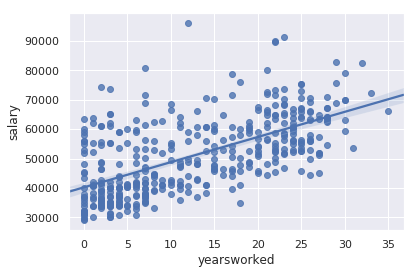

In [32]:
sns.set()
sns.regplot(x='yearsworked', y='salary', data=train)
plt.show()

## QUESTION 2

### A simple linear regression for Salary with one predictor variable: Years Worked.

In [83]:
lr = smf.ols(formula='salary ~ yearsworked', data=train).fit()

# print the coefficients
lr.params

Intercept      0.418065
yearsworked    0.008907
dtype: float64

In [89]:
X = train["yearsworked"]
y = train["salary"]

# Note the difference in argument order
x = sm.add_constant(X)
model = sm.OLS(y, x).fit()
predictions = model.predict(x) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     253.9
Date:                Tue, 11 Feb 2020   Prob (F-statistic):           8.50e-45
Time:                        16:30:05   Log-Likelihood:                 337.41
No. Observations:                 410   AIC:                            -670.8
Df Residuals:                     408   BIC:                            -662.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4181      0.009     47.796      0.000       0.401       0.435
yearsworked     0.0089      0.001     15.936      0.000       0.008       0.010
==============================================================================
Omnibus:                       64.124   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.011
Skew:                           1.032   Prob(JB):                     6.35e-21
Kurtosis:                       4.087   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""